In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
partition = pd.read_csv('extracted_metrics/medium.csv')
partition['date'] = partition['date'].apply(lambda x: datetime.fromtimestamp(x))

After row 260910, data seems to be corrupted.

In [3]:
partition = partition[:260909]
partition.tail()

,date,alloc_mem,allocated_cpus_per_job,allocated_nodes_per_job,availability,cores,cpus,cpus_load_lower,cpus_load_upper,execution_time_per_job,...,node_idle,node_other,node_total,nodes,pending_jobs,queue_time_per_job,requested_cpus_per_job,running_jobs,time_left_per_job,time_limit
260904,2022-11-22 10:59:33.874,107804.444444,595.705722,2.326975,1.0,16.0,256.0,79.826667,116.226667,54284.72752,...,95.0,0.0,1364.0,1364.0,36.0,16937.655087,227.555556,367.0,66768.171216,129600.0
260905,2022-11-22 10:59:38.874,107804.444444,595.705722,2.326975,1.0,16.0,256.0,79.826667,116.226667,54284.72752,...,95.0,0.0,1364.0,1364.0,36.0,16937.655087,227.555556,367.0,66768.171216,129600.0
260906,2022-11-22 10:59:43.874,107804.444444,595.705722,2.326975,1.0,16.0,256.0,79.826667,116.226667,54284.72752,...,95.0,0.0,1364.0,1364.0,36.0,16937.655087,227.555556,367.0,66768.171216,129600.0
260907,2022-11-22 10:59:48.874,107804.444444,595.705722,2.326975,1.0,16.0,256.0,79.826667,116.226667,54284.72752,...,95.0,0.0,1364.0,1364.0,36.0,16937.655087,227.555556,367.0,66768.171216,129600.0
260908,2022-11-22 10:59:53.874,107804.444444,595.705722,2.326975,1.0,16.0,256.0,79.826667,116.226667,54284.72752,...,95.0,0.0,1364.0,1364.0,36.0,16937.655087,227.555556,367.0,66768.171216,129600.0


In [14]:
partition.dtypes

date                                datetime64[ns]
alloc_mem                                  float64
allocated_cpus_per_job                     float64
allocated_nodes_per_job                    float64
availability                               float64
cores                                      float64
cpus                                       float64
cpus_load_lower                            float64
cpus_load_upper                            float64
execution_time_per_job                     float64
free_mem_lower                             float64
free_mem_upper                             float64
job_size_lower                             float64
job_size_upper                             float64
maximum_allocated_cpus_per_job             float64
maximum_allocated_nodes_per_job            float64
memory                                     float64
minimum_requested_cpus_per_job             float64
minimum_requested_memory_per_job           float64
minimum_requested_nodes_per_job

Some features (columns) show fixed values (std deviation is zero).
Filtering out those columns

In [58]:
partition.std()

date                                4 days 12:40:50.345336068
alloc_mem                                         20448.32255
allocated_cpus_per_job                             136.819234
allocated_nodes_per_job                               0.53445
availability                                              0.0
cores                                                     0.0
cpus                                                      0.0
cpus_load_lower                                     21.173276
cpus_load_upper                                     28.004791
execution_time_per_job                           13464.075742
free_mem_lower                                   14473.664201
free_mem_upper                                    9772.808029
job_size_lower                                            0.0
job_size_upper                                            0.0
maximum_allocated_cpus_per_job                     132.738938
maximum_allocated_nodes_per_job                       0.53445
memory  

In [4]:
partition = partition.drop(partition.columns[partition.apply(lambda col: col.std()==0)], axis=1)

/tmp/ipykernel_32473/935326980.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


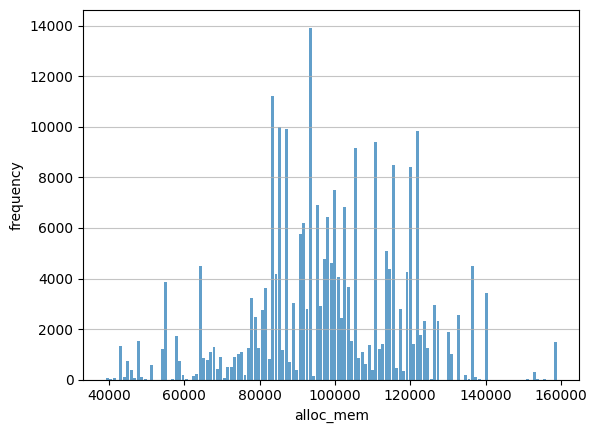

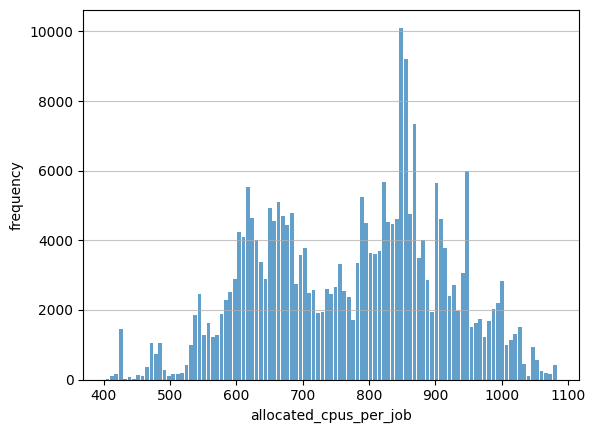

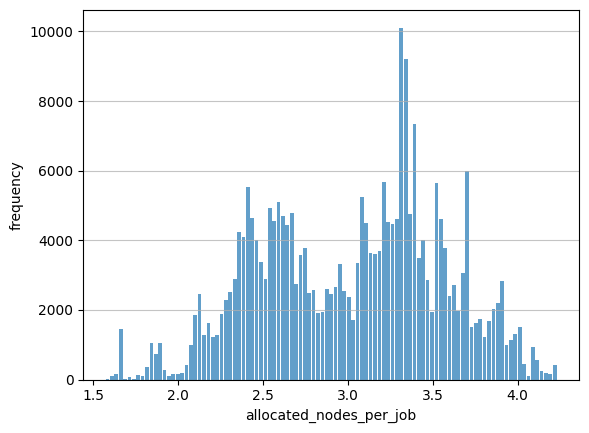

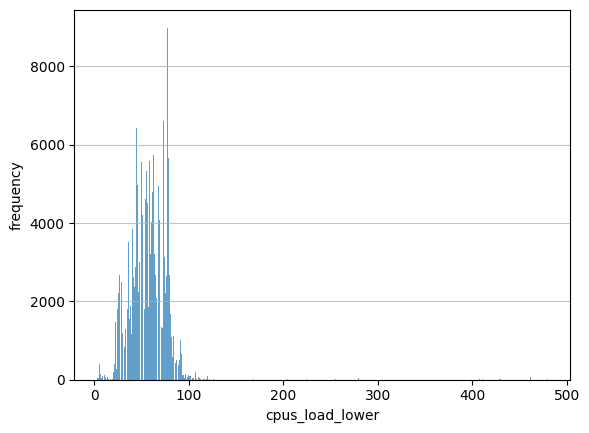

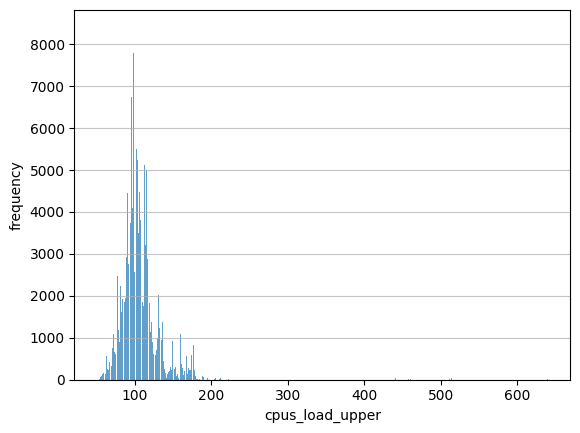

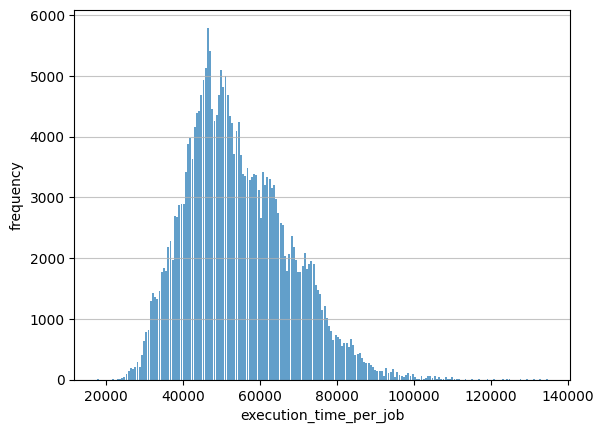

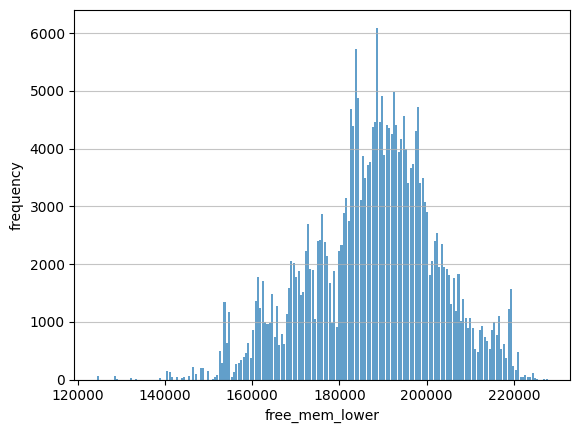

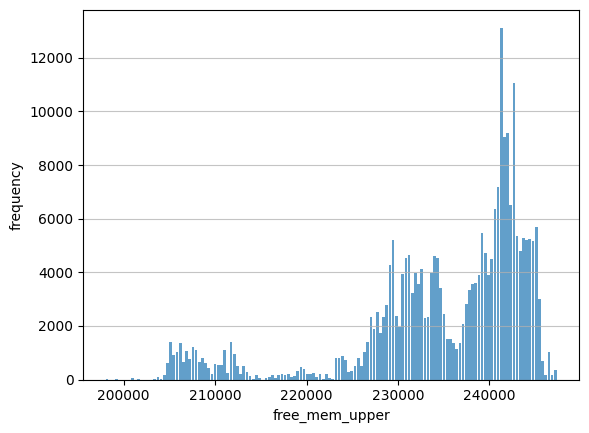

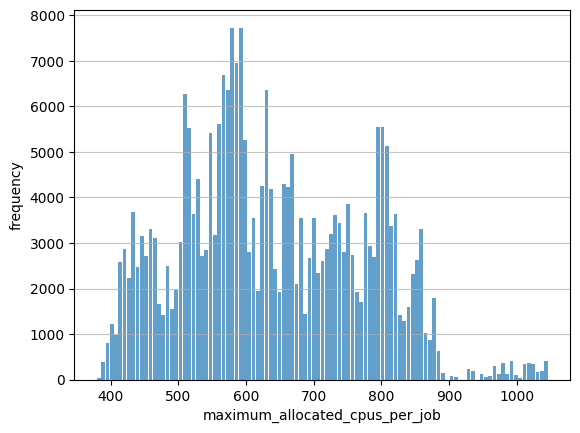

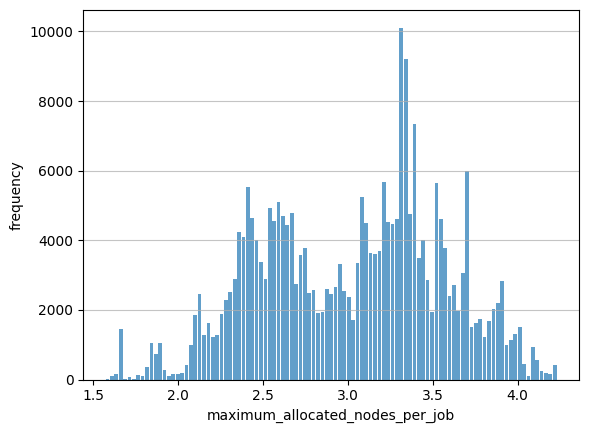

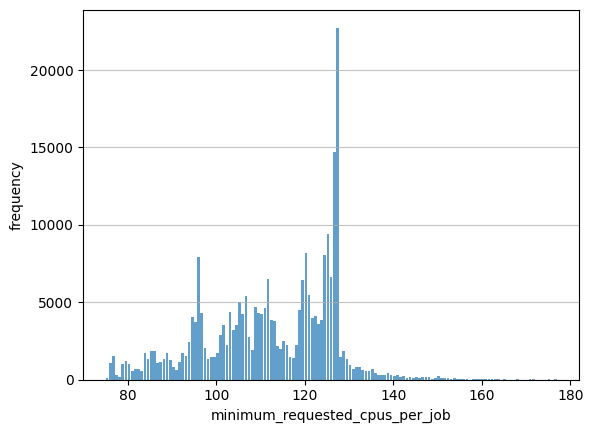

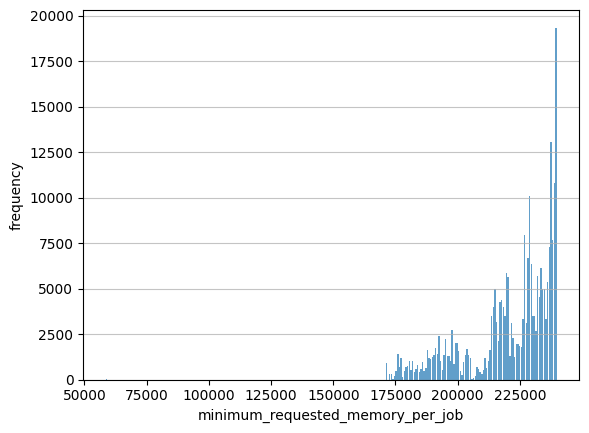

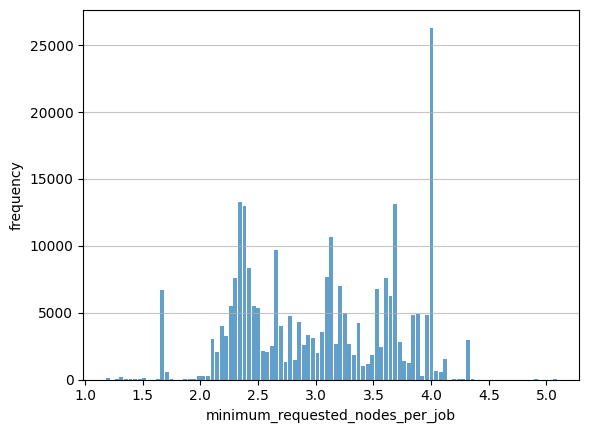

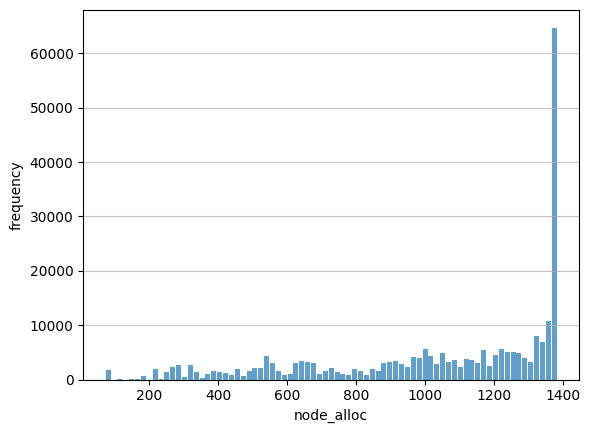

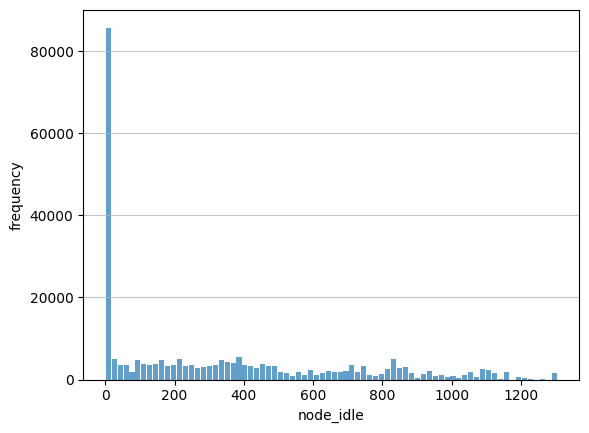

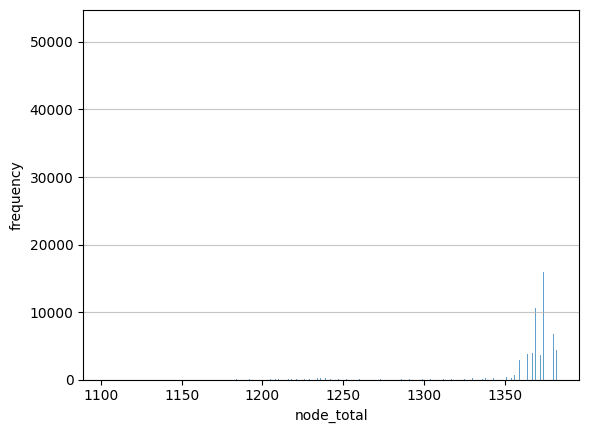

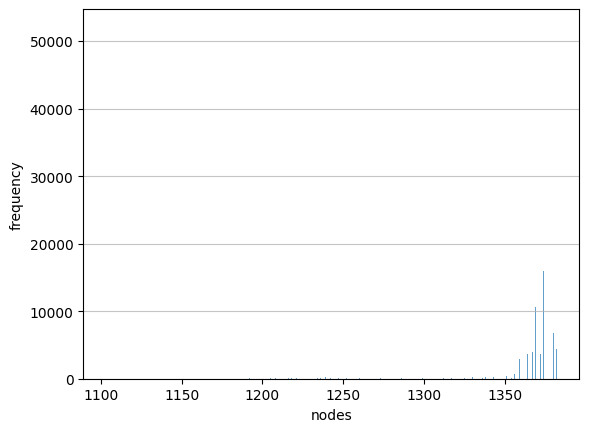

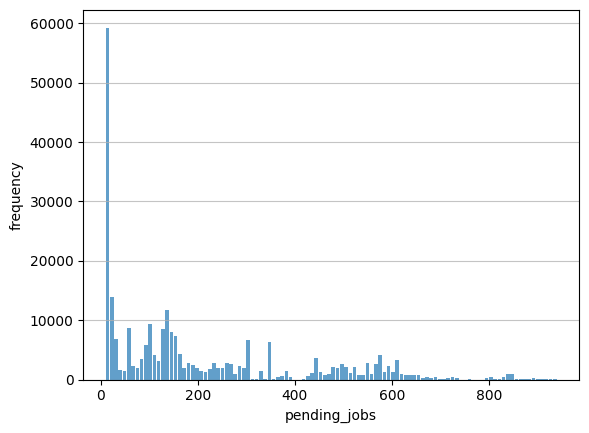

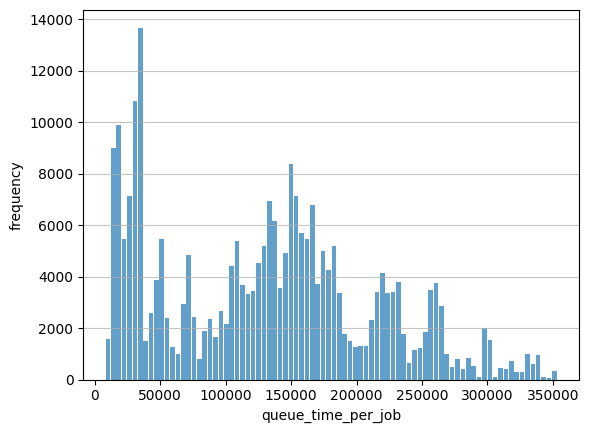

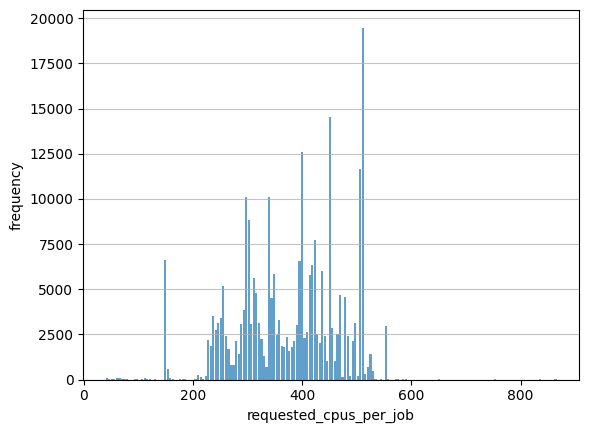

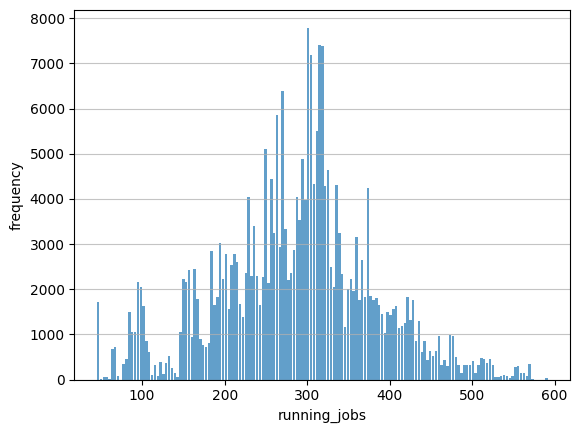

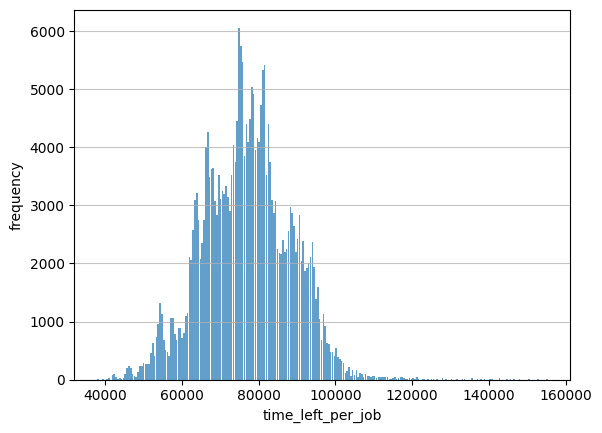

In [81]:
for i in partition.columns[1:]:
    plt.figure()
    plt.hist(x=partition[i], bins='auto', alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel(i)
    plt.ylabel('frequency')
plt.show()

/tmp/ipykernel_7587/3354493420.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


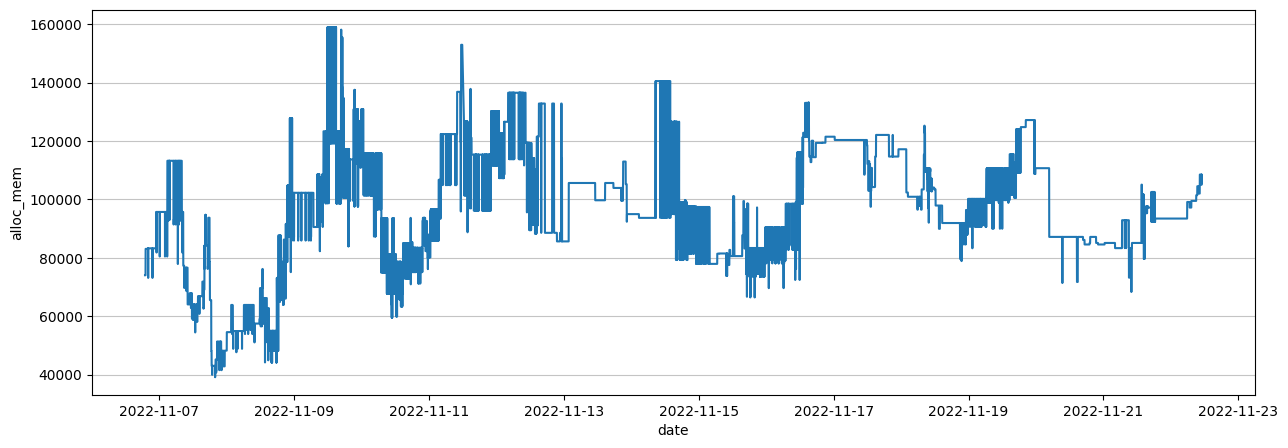

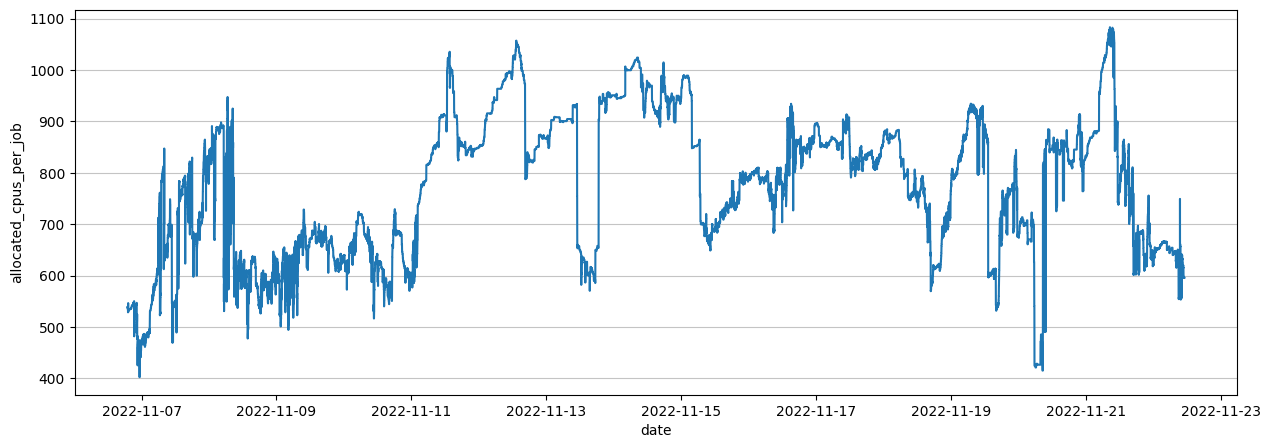

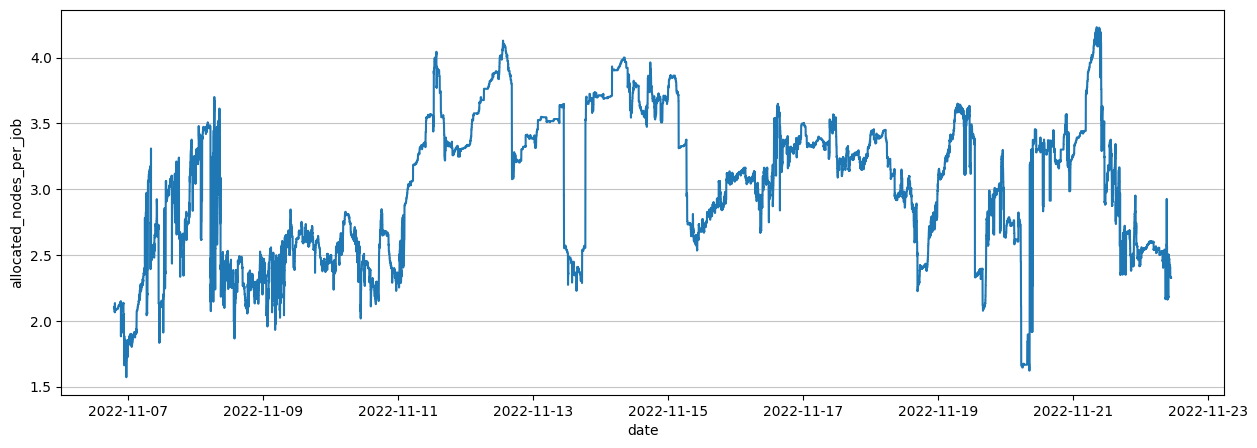

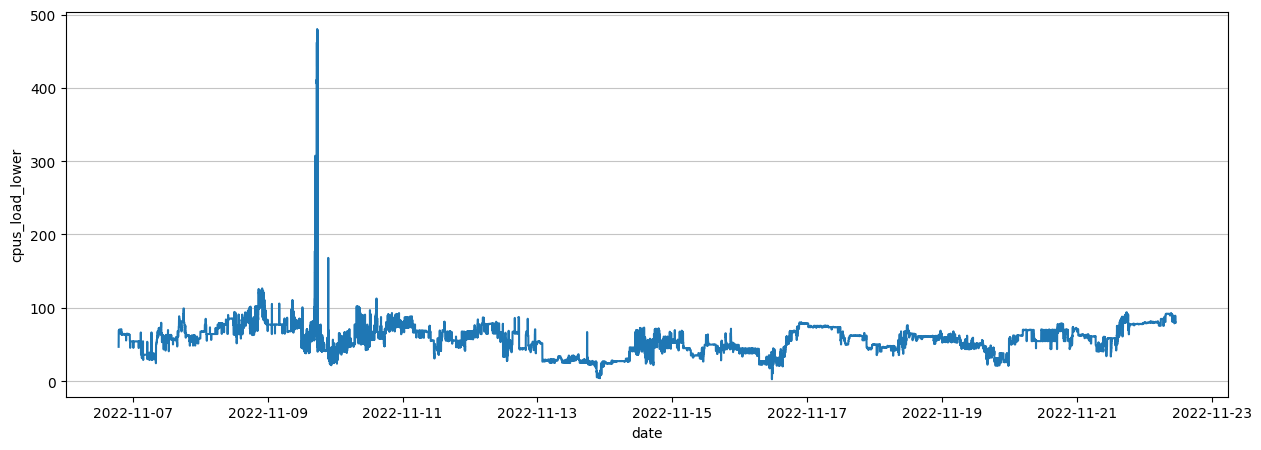

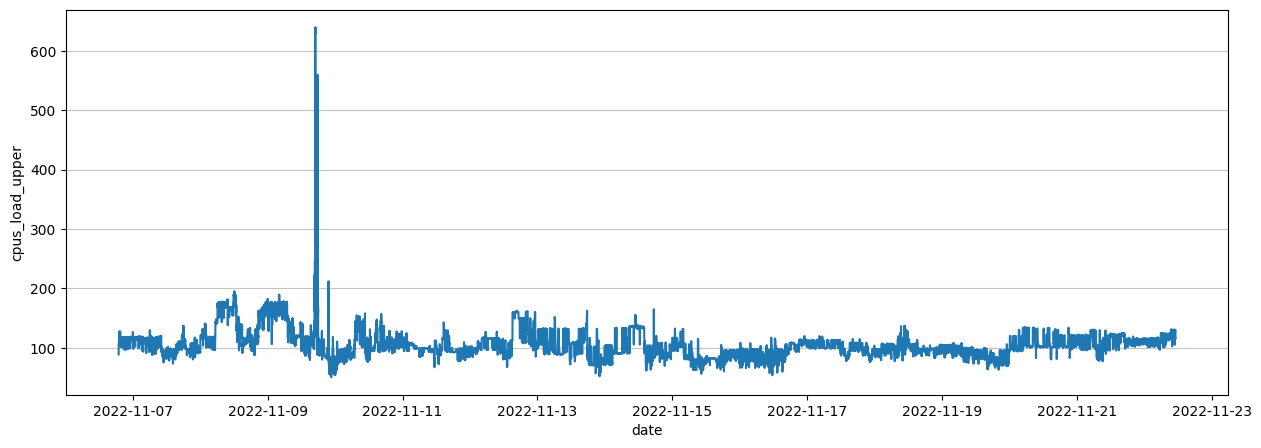

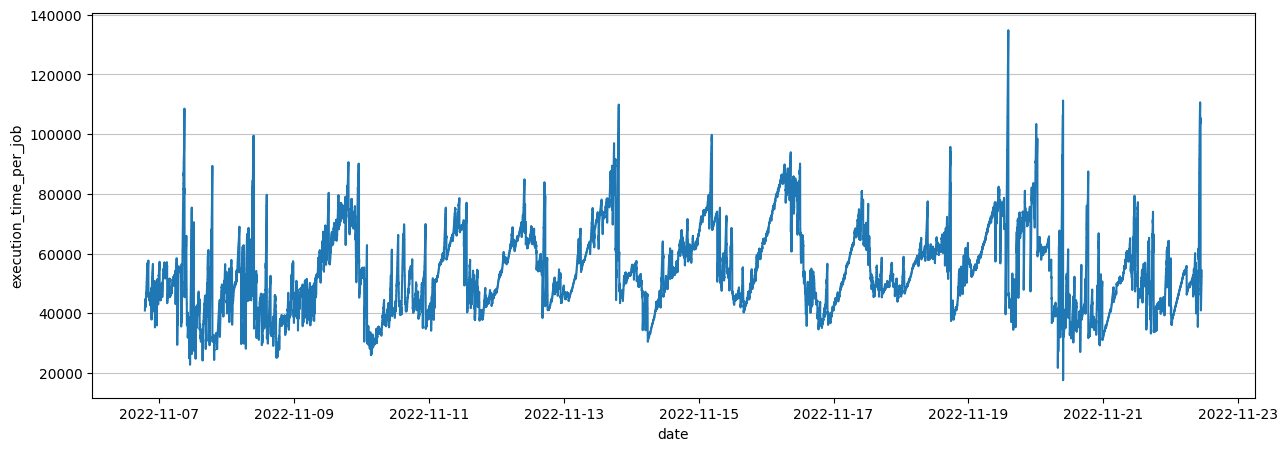

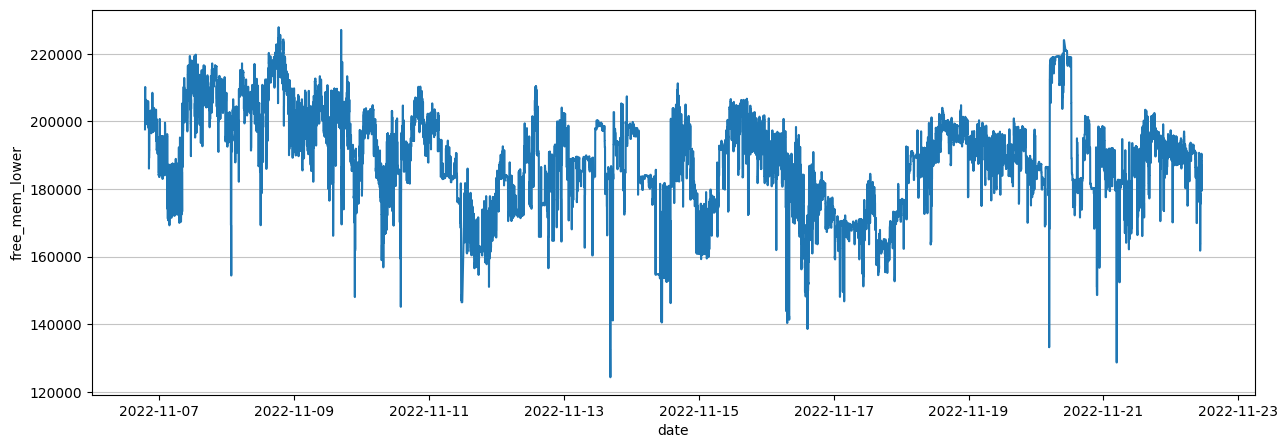

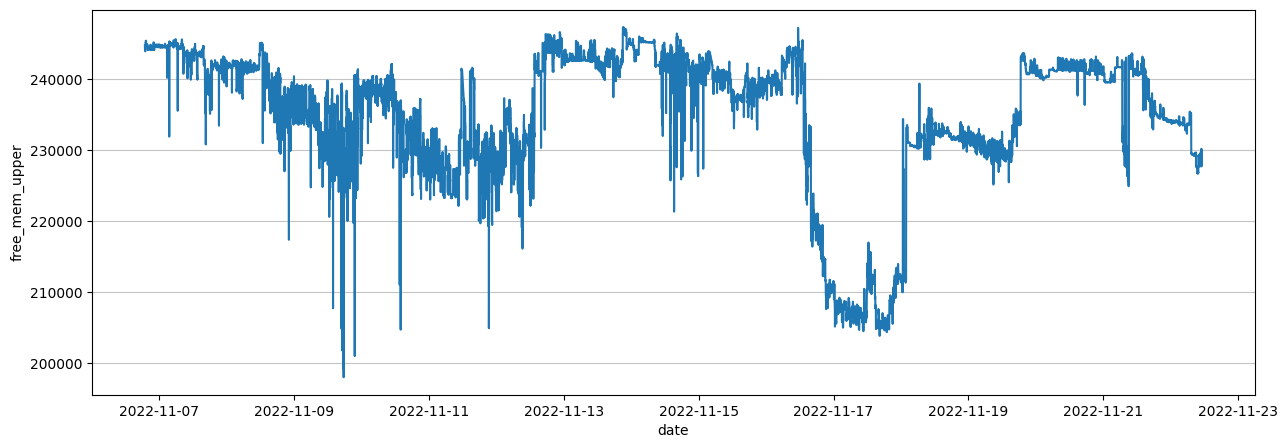

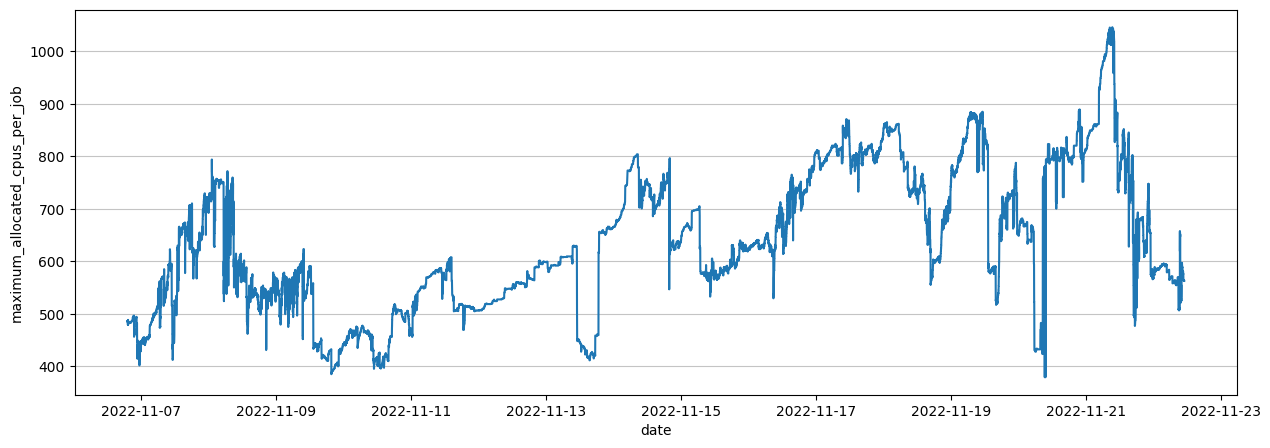

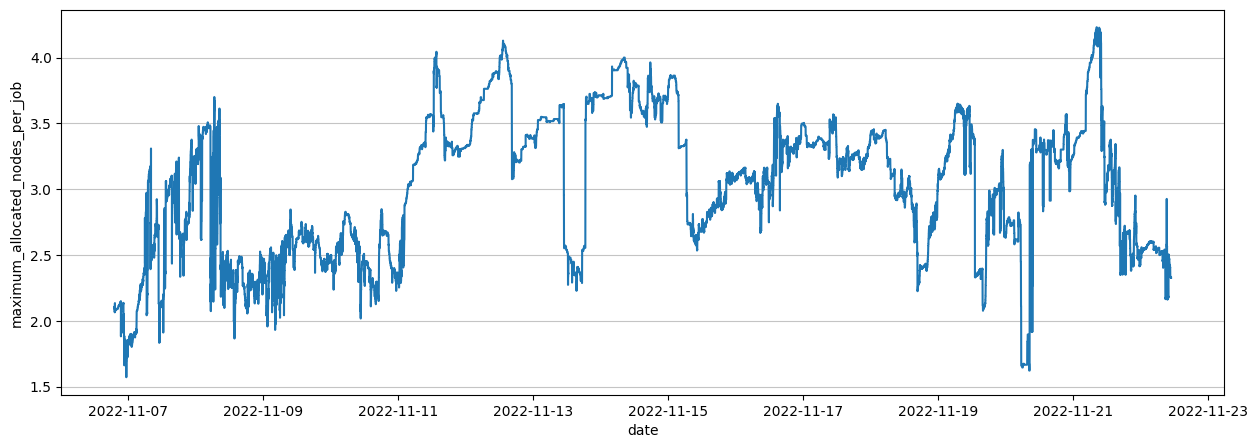

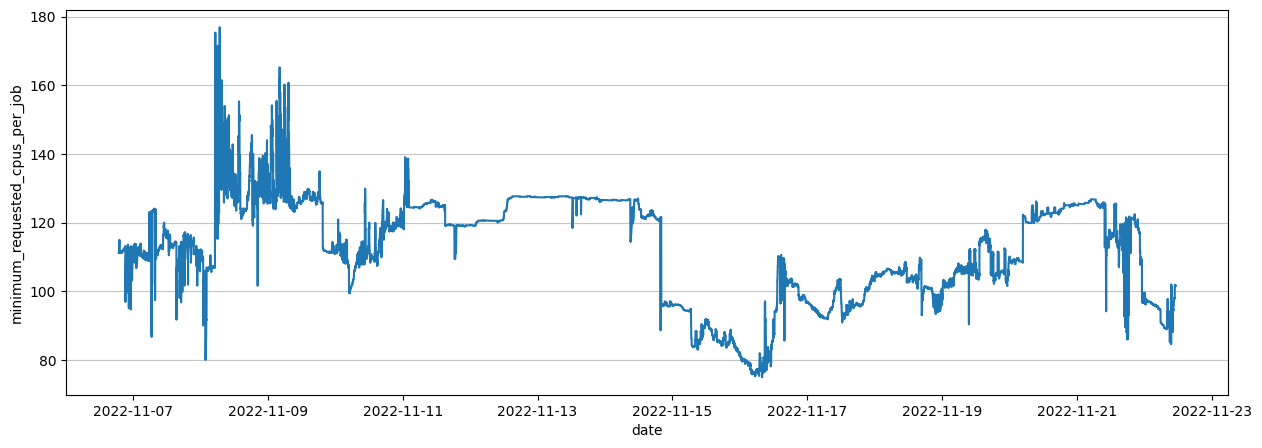

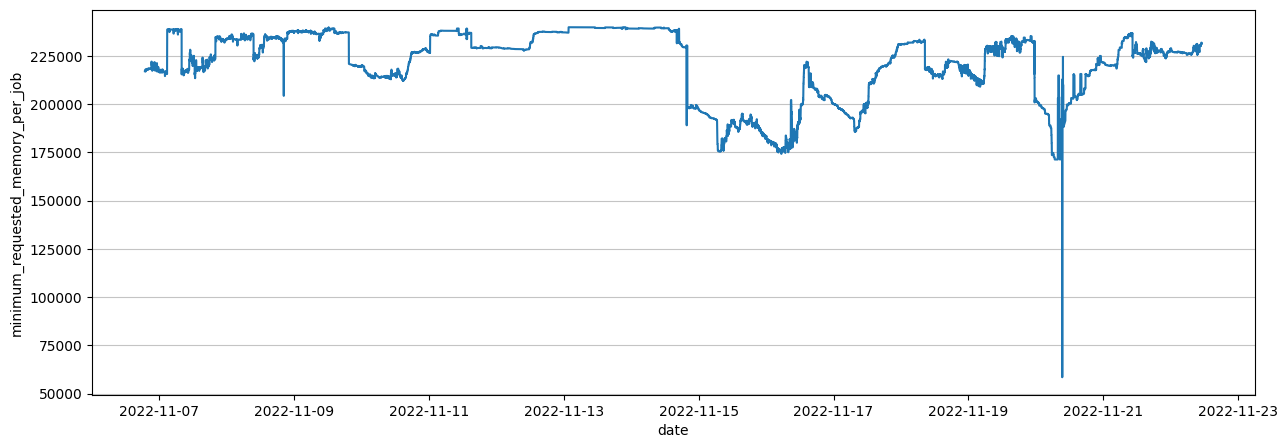

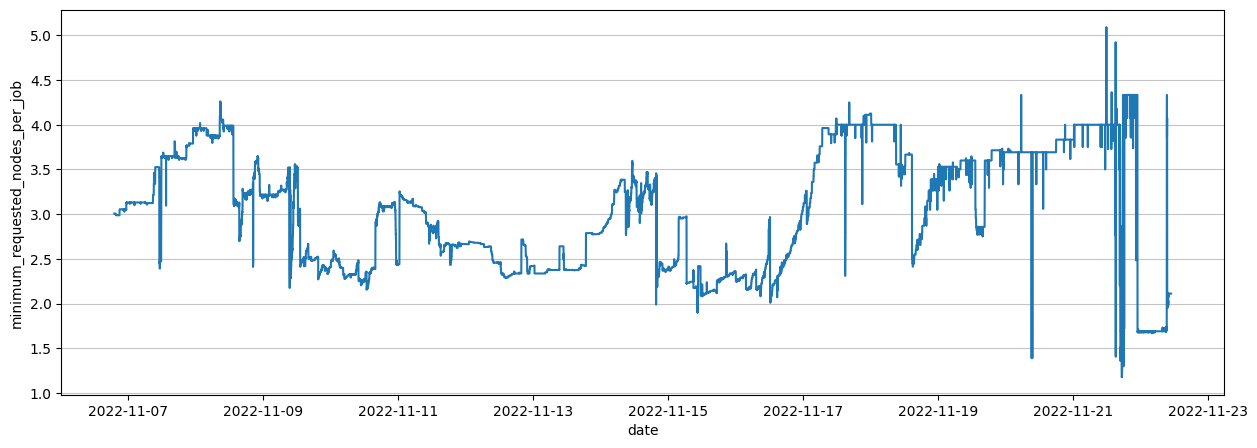

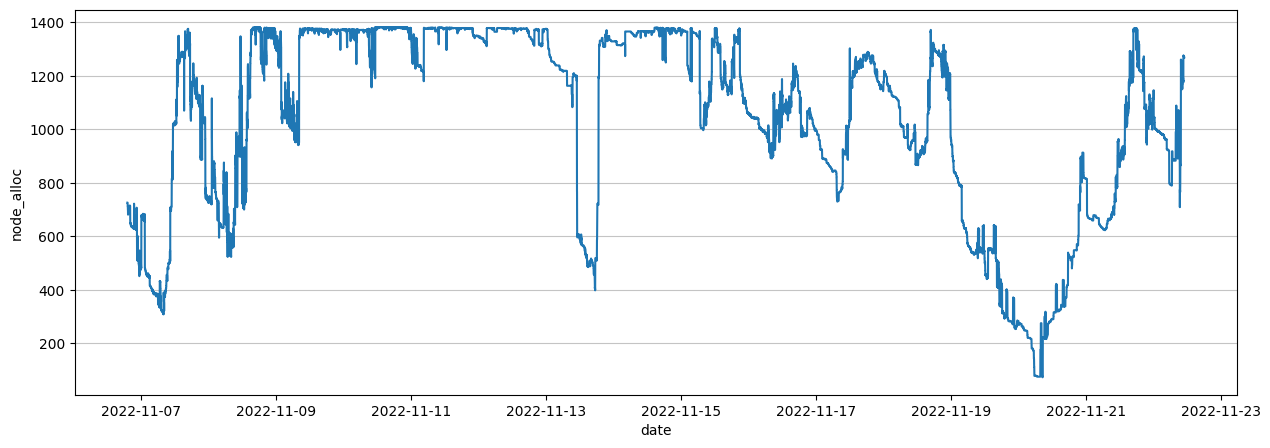

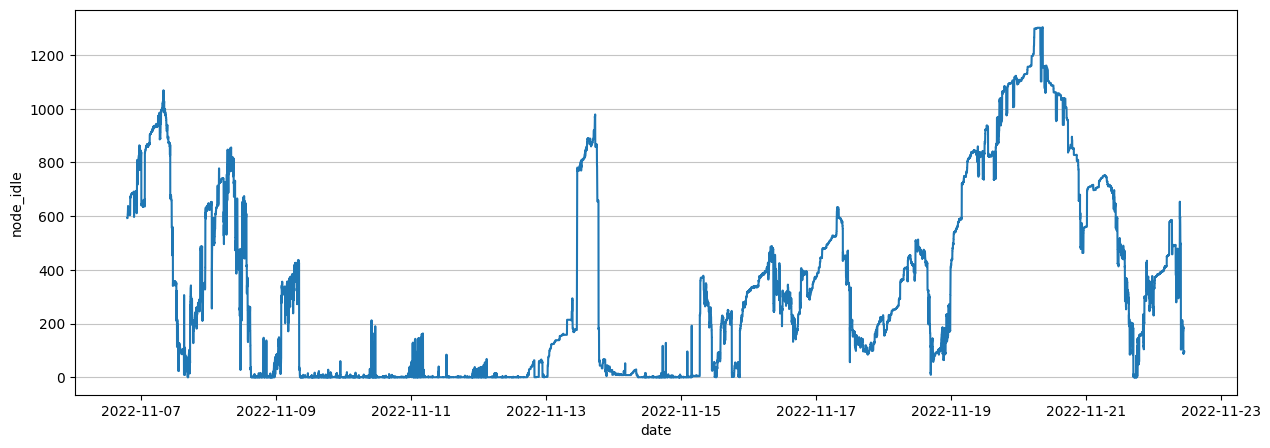

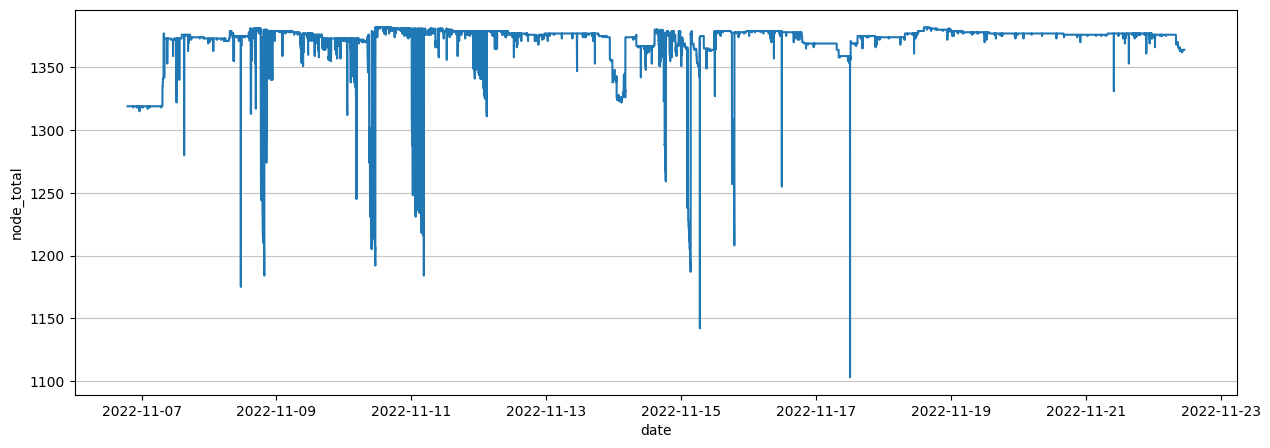

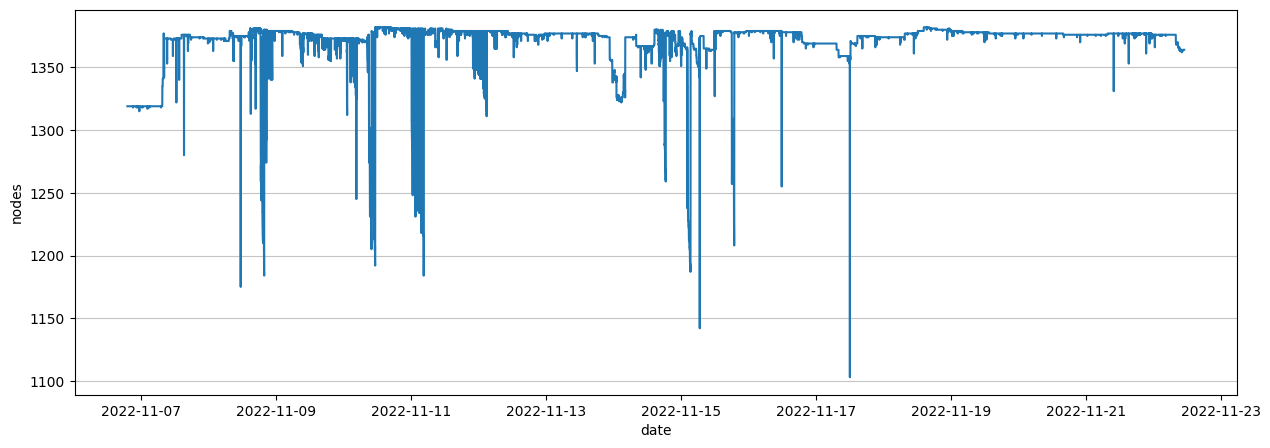

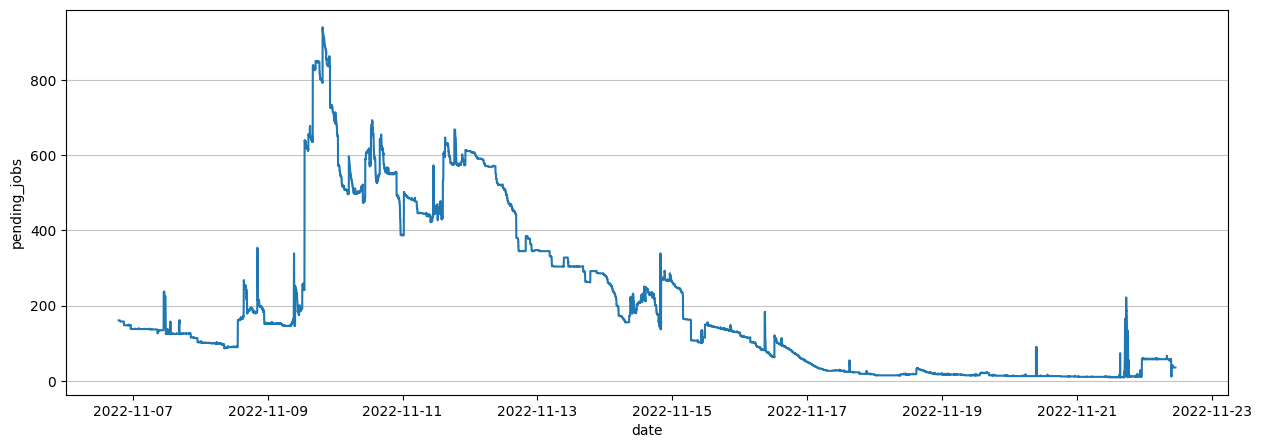

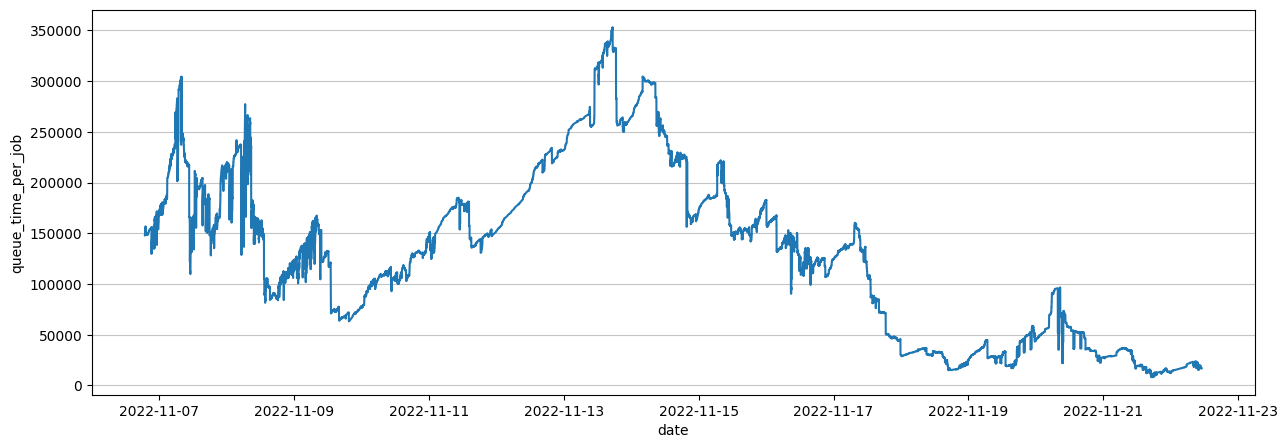

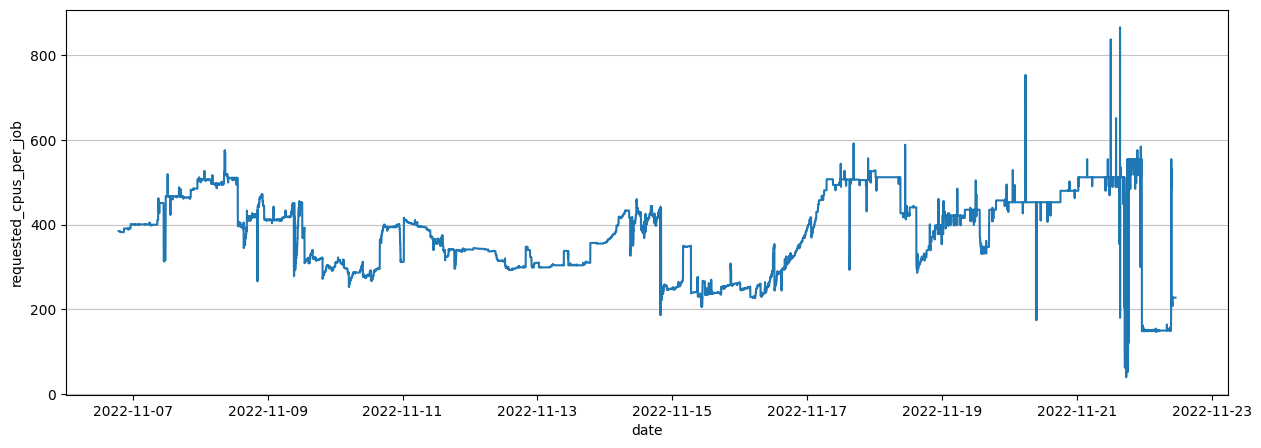

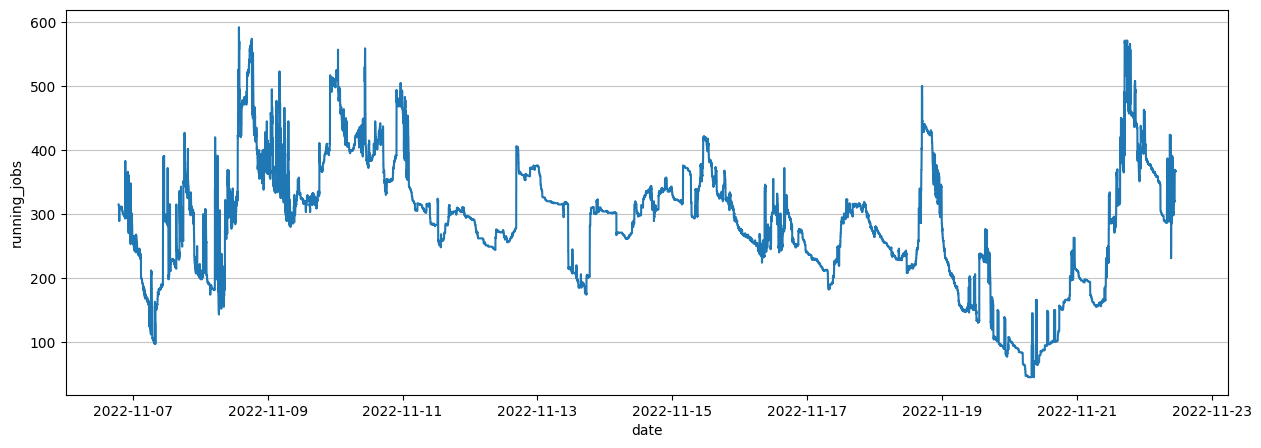

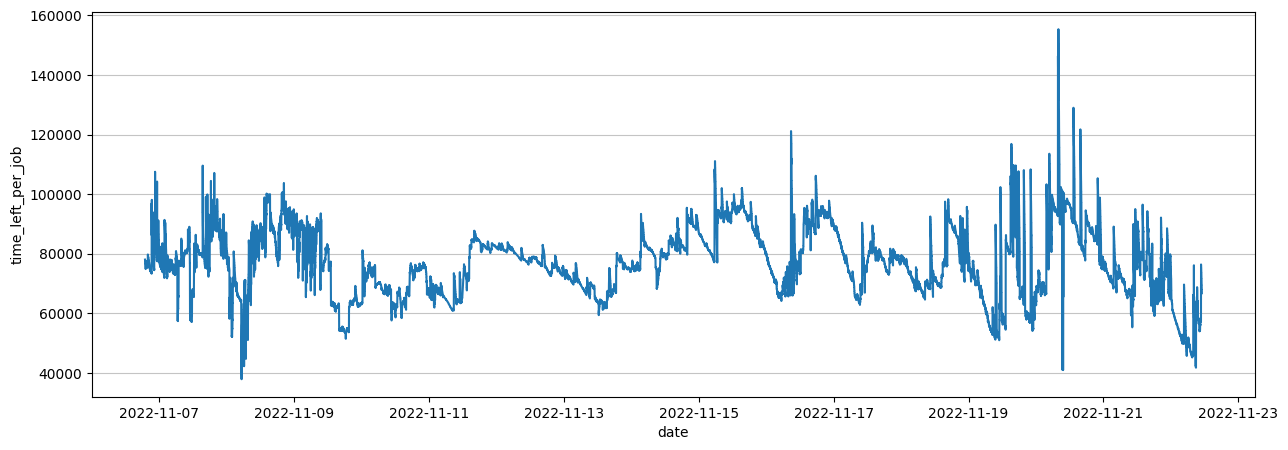

In [5]:
plt.rcParams['figure.figsize'] = [15, 5]
for i in partition.columns[1:]:
    plt.figure()
    plt.plot(partition['date'], partition[i])
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('date')
    plt.ylabel(i)
plt.show()

Correlations between metrics

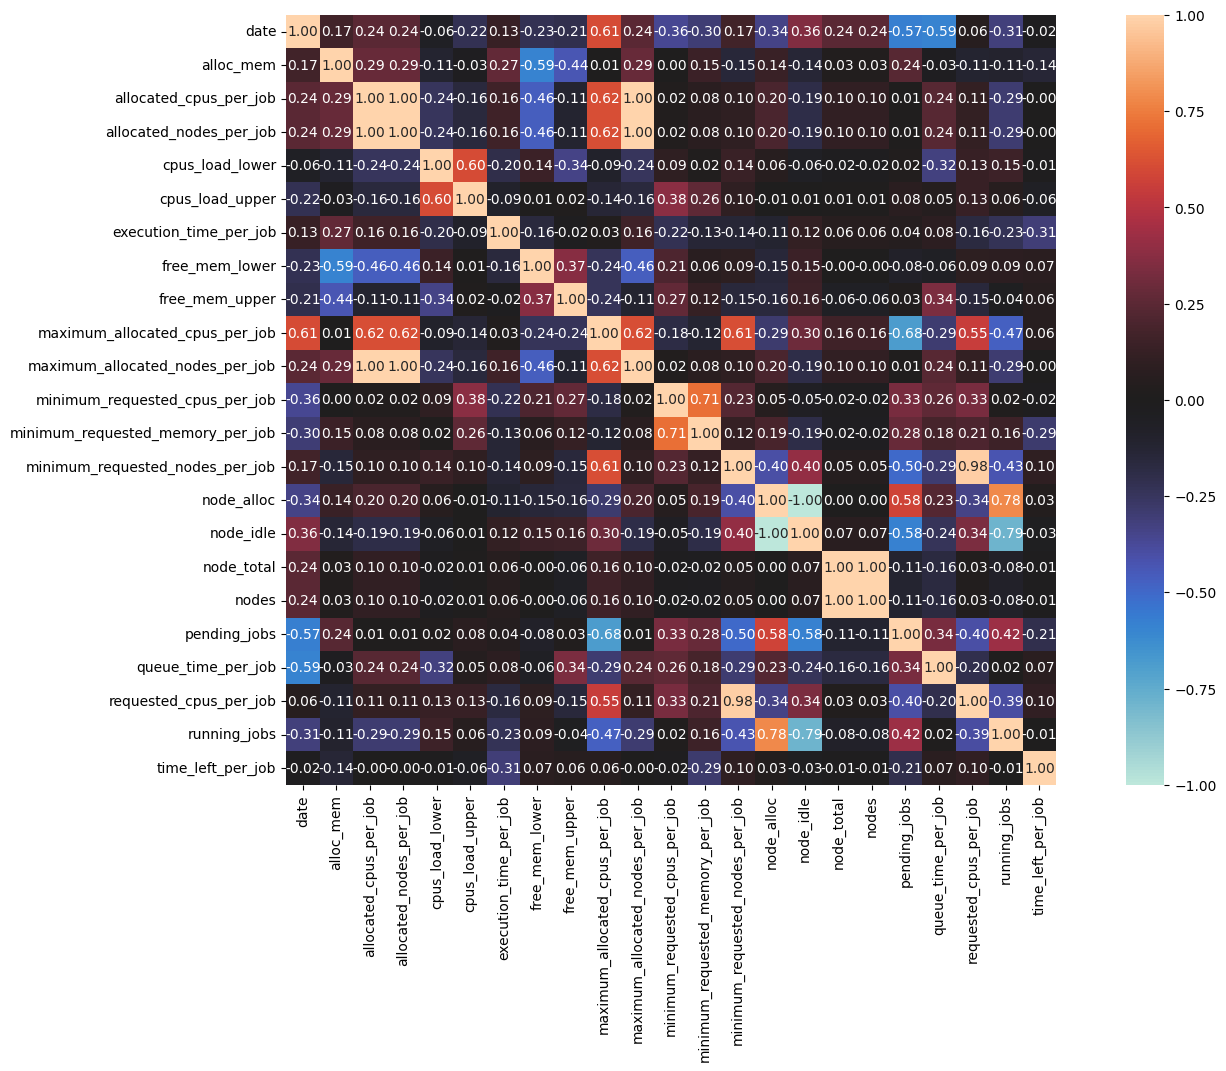

{'corr':                                       date  alloc_mem  allocated_cpus_per_job  \
 date                              1.000000   0.171467                0.244341   
 alloc_mem                         0.171467   1.000000                0.286509   
 allocated_cpus_per_job            0.244341   0.286509                1.000000   
 allocated_nodes_per_job           0.244341   0.286509                1.000000   
 cpus_load_lower                  -0.055994  -0.110256               -0.243843   
 cpus_load_upper                  -0.223914  -0.029066               -0.162938   
 execution_time_per_job            0.129426   0.266084                0.163677   
 free_mem_lower                   -0.225214  -0.587955               -0.463907   
 free_mem_upper                   -0.208560  -0.435132               -0.112062   
 maximum_allocated_cpus_per_job    0.605452   0.007685                0.615269   
 maximum_allocated_nodes_per_job   0.244341   0.286509                1.000000   
 minimum

In [9]:
import dython

dython.nominal.associations(partition, figsize=(18, 10))

In [ ]:
Autocorrelation
Running_jobs as example

In [5]:
running_jobs = partition[['date', 'running_jobs']]

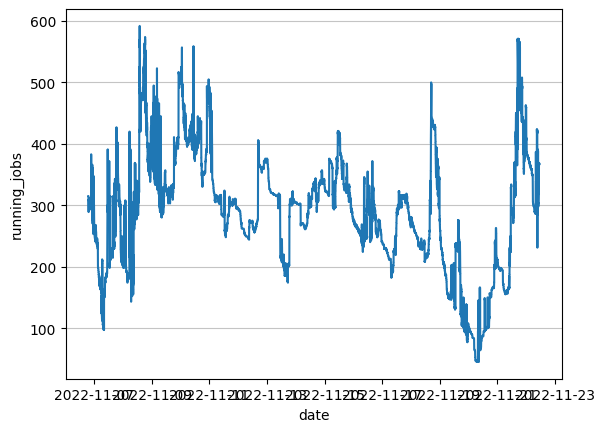

In [19]:
plt.figure()
plt.plot(running_jobs['date'], running_jobs['running_jobs'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('date')
plt.ylabel('running_jobs')
plt.show()

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

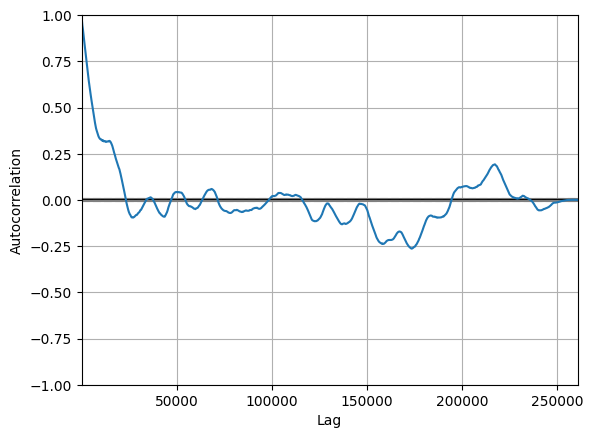

In [26]:
pd.plotting.autocorrelation_plot(running_jobs['running_jobs'])

In [47]:
from statsmodels.tsa import stattools
running_jobs = pd.Series(name='running_jobs', data=partition['running_jobs'].values, index=partition['date'])

stattools.adfuller(running_jobs.resample('30T').mean())

(-3.680689145578604,
 0.004393125063150464,
 3,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6625.372095348508)

In [14]:
running_jobs.head()

date
2022-11-06 19:00:03.874    315.0
2022-11-06 19:00:08.874    315.0
2022-11-06 19:00:13.874    315.0
2022-11-06 19:00:18.874    315.0
2022-11-06 19:00:23.874    315.0
Name: running_jobs, dtype: float64

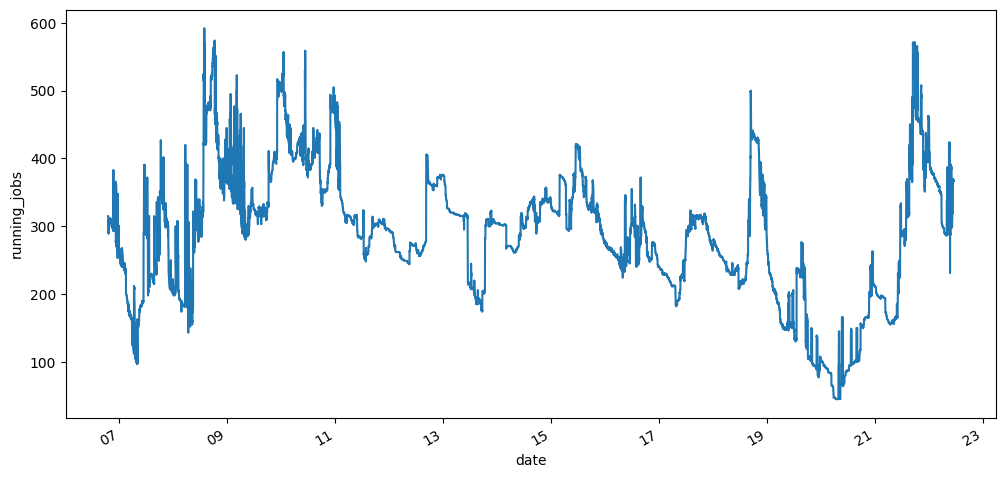

In [39]:
from matplotlib.dates import DateFormatter
date_formatter = DateFormatter("%d")
ax = running_jobs.plot(figsize=(12, 6))
ax.xaxis.set_major_formatter(date_formatter)
plt.ylabel('running_jobs')
plt.xlabel('date');

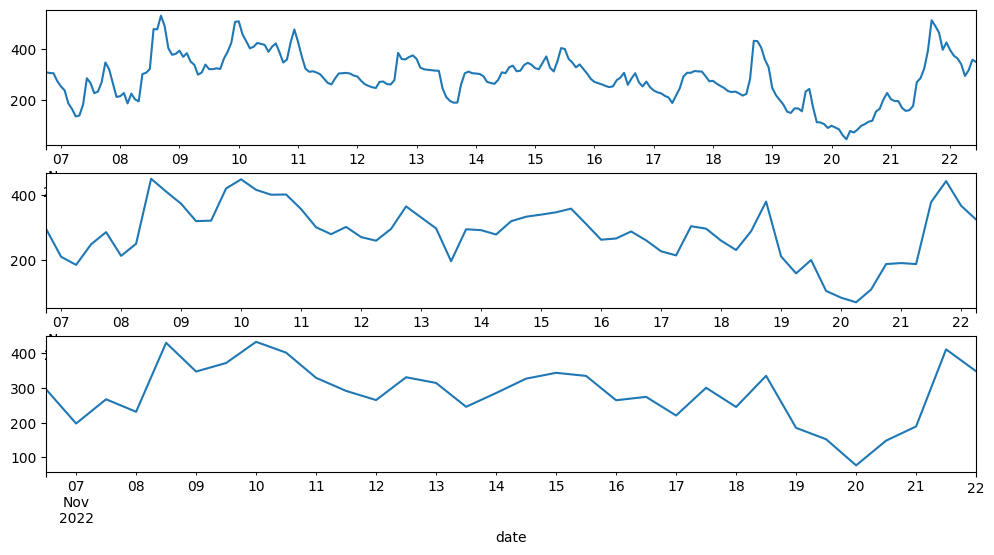

In [45]:
plt.subplot(311)
ax1 = running_jobs.resample('90T').mean().plot(figsize=(12, 6))
plt.subplot(312)
ax1 = running_jobs.resample('360T').mean().plot(figsize=(12, 6))
plt.subplot(313)
ax1 = running_jobs.resample('720T').mean().plot(figsize=(12, 6))


Text(0, 0.5, 'running_jobs/Hz')

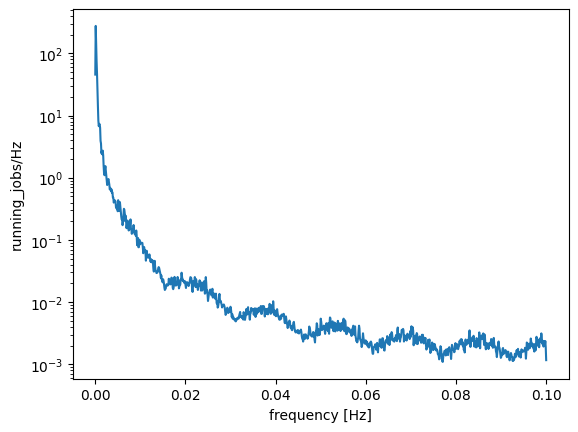

In [49]:
from scipy import signal
f, Pxx_den = signal.welch(running_jobs.values, 0.2, nperseg=2048, scaling='spectrum')
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('running_jobs/Hz')